In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import urllib.request
from bs4 import BeautifulSoup
!pip install geocoder
!pip install folium
import geocoder
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 98 kB 9.3 MB/s  eta 0:00:01
     |████████████████████████████████| 94 kB 5.7 MB/s  eta 0:00:01
Libraries imported.


In [2]:
# Importing Wikipedia webpage
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
our_table = soup

In [3]:
# Creating three seperate lists for each column and appending target values; creating the table
A = []
B = []
C = []

for row in our_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells) == 3:
        A.append(cells[0].find(text = True))
        B.append(cells[1].find(text = True))
        C.append(cells[2].find(text = True))

In [4]:
# Naming the columns
df = pd.DataFrame(A, columns = ['Postal Code'])
df['Borough'] = B
df['Neighbourhood'] = C

In [5]:
# Dropping 'Not assigned' values from the Borough column
# Cutting the \n values which would otherwise print as well
df.drop(df.loc[df['Borough'] == 'Not assigned\n'].index, inplace = True)
df = df.replace('\n','', regex = True)

In [6]:
# Merging the Neighbourhoods that have the same Postal Code
df.groupby('Postal Code')['Neighbourhood'].apply(','.join)

Postal Code
M1B                                       Malvern, Rouge
M1C               Rouge Hill, Port Union, Highland Creek
M1E                    Guildwood, Morningside, West Hill
M1G                                               Woburn
M1H                                            Cedarbrae
M1J                                  Scarborough Village
M1K          Kennedy Park, Ionview, East Birchmount Park
M1L                      Golden Mile, Clairlea, Oakridge
M1M      Cliffside, Cliffcrest, Scarborough Village West
M1N                          Birch Cliff, Cliffside West
M1P    Dorset Park, Wexford Heights, Scarborough Town...
M1R                                    Wexford, Maryvale
M1S                                            Agincourt
M1T              Clarks Corners, Tam O'Shanter, Sullivan
M1V    Milliken, Agincourt North, Steeles East, L'Amo...
M1W                        Steeles West, L'Amoreaux West
M1X                                          Upper Rouge
M2H                

In [7]:
# Replacing 'Not assigned' in Neighbourghoods with the value from Borough
df['Neighbourhood'].replace('Not assigned',df['Borough'])

2                                              Parkwoods
3                                       Victoria Village
4                              Regent Park, Harbourfront
5                       Lawrence Manor, Lawrence Heights
6            Queen's Park, Ontario Provincial Government
8                Islington Avenue, Humber Valley Village
9                                         Malvern, Rouge
11                                             Don Mills
12                       Parkview Hill, Woodbine Gardens
13                              Garden District, Ryerson
14                                             Glencairn
17     West Deane Park, Princess Gardens, Martin Grov...
18                Rouge Hill, Port Union, Highland Creek
20                                             Don Mills
21                                      Woodbine Heights
22                                        St. James Town
23                                    Humewood-Cedarvale
26     Eringate, Bloordale Gard

In [8]:
df.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [9]:
geo = pd.read_csv('http://cocl.us/Geospatial_data')
geo.tail()

,Postal Code,Latitude,Longitude
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437
102,M9W,43.706748,-79.594054


In [10]:
# Merging both tables together to add 'Latitude' and 'Longitude'
df2 = df.merge(geo, how = 'inner', on = 'Postal Code')

In [11]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [12]:
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df2['Latitude'], df2['Longitude'], df2['Borough'], df2['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [13]:
toronto_data = df2[df2['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
toronto_data.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [14]:
CLIENT_ID = '2K10VTMNS55ZCVJWRIJ3H3V5FXAZC023DJ1ODSON1Y3AZFDF' # your Foursquare ID
CLIENT_SECRET = '0WCX1JABH2JU1STXRUUOXX33BODIVEEIX2YOV0K55JMFZUTK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2K10VTMNS55ZCVJWRIJ3H3V5FXAZC023DJ1ODSON1Y3AZFDF
CLIENT_SECRET:0WCX1JABH2JU1STXRUUOXX33BODIVEEIX2YOV0K55JMFZUTK


In [15]:
toronto_data.loc[0, 'Neighbourhood']

'Regent Park, Harbourfront'

In [16]:
neighborhood_latitude = toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


In [17]:
LIMIT = 100 
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=2K10VTMNS55ZCVJWRIJ3H3V5FXAZC023DJ1ODSON1Y3AZFDF&client_secret=0WCX1JABH2JU1STXRUUOXX33BODIVEEIX2YOV0K55JMFZUTK&v=20180605&ll=43.6542599,-79.3606359&radius=500&limit=100'

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '602d99b177c0b13d34d81659'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 45,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
 

In [19]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Body Blitz Spa East,Spa,43.654735,-79.359874
4,Impact Kitchen,Restaurant,43.656369,-79.356980


In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

45 venues were returned by Foursquare.


In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude'])

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


In [24]:
print(toronto_venues.shape)
toronto_venues.head()

(1219, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


In [25]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,55,55,55,55,55,55
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",14,14,14,14,14,14
Central Bay Street,62,62,62,62,62,62
Christie,16,16,16,16,16,16
Church and Wellesley,77,77,77,77,77,77
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


In [26]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 206 uniques categories.


In [27]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [28]:
toronto_onehot.shape

(1219, 206)

In [29]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.018182,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.018182,0.036364,0.000000,0.000000,0.00,0.018182,0.018182,0.000000,0.036364,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018182,0.0000,0.000000,0.036364,0.000000,0.000000,0.000000,0.018182,0.054545,0.090909,0.00000,0.000000,0.000000,0.00000,0.00,0.000000,0.018182,0.000000,0.018182,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.018182,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.036364,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.018182,0.018182,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.018182,0.018182,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.018182,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.018182,0.018182,0.00

In [30]:
toronto_grouped.shape

(19, 206)

In [31]:
num_top_venues = 10

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2            Pharmacy  0.04
3  Seafood Restaurant  0.04
4      Farmers Market  0.04
5              Bakery  0.04
6         Cheese Shop  0.04
7          Restaurant  0.04
8            Beer Bar  0.04
9       Grocery Store  0.02


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                 venue  freq
0      Airport Service  0.14
1          Coffee Shop  0.07
2      Harbor / Marina  0.07
3  Rental Car Location  0.07
4     Sculpture Garden  0.07
5        Boat or Ferry  0.07
6                Plane  0.07
7                  Bar  0.07
8     Airport Terminal  0.07
9       Airport Lounge  0.07


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.18
1  Italian Restaurant  0.06
2      Sandwich Place  0.05
3                Café  0.05
4         Salad Place  0.03
5     Bubble Tea Shop  0.03
6        Bu

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Cheese Shop,Beer Bar,Seafood Restaurant,Restaurant,Bakery,Farmers Market,Pharmacy,Comfort Food Restaurant
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Sculpture Garden,Boat or Ferry,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Terminal,Bar,Harbor / Marina
2,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Salad Place,Bubble Tea Shop,Burger Joint,Miscellaneous Shop,Japanese Restaurant,Juice Bar
3,Christie,Grocery Store,Café,Park,Candy Store,Nightclub,Coffee Shop,Restaurant,Italian Restaurant,Athletics & Sports,Baby Store
4,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Restaurant,Burger Joint,Pub,Hotel,Yoga Studio,Mediterranean Restaurant


In [34]:
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

kmeans.labels_[0:10]

array([3, 0, 1, 2, 1, 1, 1, 3, 1, 3], dtype=int32)

In [35]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Bakery,Park,Restaurant,Breakfast Spot,Pub,Theater,Café,Cosmetics Shop,Beer Store
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1,Coffee Shop,Gym,Sushi Restaurant,Yoga Studio,Burger Joint,Bar,Italian Restaurant,Japanese Restaurant,Sandwich Place,Distribution Center
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,3,Clothing Store,Coffee Shop,Cosmetics Shop,Bubble Tea Shop,Japanese Restaurant,Italian Restaurant,Café,Middle Eastern Restaurant,Diner,Hotel
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,3,Café,Coffee Shop,American Restaurant,Gastropub,Cocktail Bar,Clothing Store,Farmers Market,Gym,Hotel,Department Store
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,3,Coffee Shop,Cocktail Bar,Cheese Shop,Beer Bar,Seafood Restaurant,Restaurant,Bakery,Farmers Market,Pharmacy,Comfort Food Restaurant


In [36]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [37]:
toronto_merged

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Bakery,Park,Restaurant,Breakfast Spot,Pub,Theater,Café,Cosmetics Shop,Beer Store
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1,Coffee Shop,Gym,Sushi Restaurant,Yoga Studio,Burger Joint,Bar,Italian Restaurant,Japanese Restaurant,Sandwich Place,Distribution Center
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,3,Clothing Store,Coffee Shop,Cosmetics Shop,Bubble Tea Shop,Japanese Restaurant,Italian Restaurant,Café,Middle Eastern Restaurant,Diner,Hotel
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,3,Café,Coffee Shop,American Restaurant,Gastropub,Cocktail Bar,Clothing Store,Farmers Market,Gym,Hotel,Department Store
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,3,Coffee Shop,Cocktail Bar,Cheese Shop,Beer Bar,Seafood Restaurant,Restaurant,Bakery,Farmers Market,Pharmacy,Comfort Food Restaurant
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,1,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Salad Place,Bubble Tea Shop,Burger Joint,Miscellaneous Shop,Japanese Restaurant,Juice Bar
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564,2,Grocery Store,Café,Park,Candy Store,Nightclub,Coffee Shop,Restaurant,Italian Restaurant,Athletics & Sports,Baby Store
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,1,Coffee Shop,Café,Restaurant,Gym,Thai Restaurant,Bakery,Clothing Store,Deli / Bodega,Bookstore,Hotel
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,1,Coffee Shop,Aquarium,Hotel,Café,Italian Restaurant,Brewery,Scenic Lookout,Fried Chicken Joint,Restaurant,Sporting Goods Shop
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,1,Coffee Shop,Hotel,Café,Japanese Restaurant,Restaurant,Italian Restaurant,Seafood Restaurant,Salad Place,American Restaurant,Deli / Bodega


In [38]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Downtown Toronto,0,Airport Service,Sculpture Garden,Boat or Ferry,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Terminal,Bar,Harbor / Marina


In [62]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
toronto_venues-


(1219, 7)

In [40]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Downtown Toronto,4,Park,Trail,Playground,Cupcake Shop,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store,Diner


In [41]:
my_cluster = toronto_venues[toronto_venues['Neighborhood'] == 'Central Bay Street']

In [42]:
my_counts = my_cluster['Venue Category'].value_counts()

In [43]:
VC1 = []

for i in my_counts:
    VC1.append(i)


In [44]:
tg = my_cluster['Venue Category']

VC2 = []

for i in tg:
    if 'estaurant' in i:
        VC2.append(i)

In [45]:
my_cluster2 = toronto_venues[toronto_venues['Neighborhood'] == 'St. James Town']

In [46]:
tg2 = my_cluster2['Venue Category']

VC22 = []

for i in tg2:
    if 'estaurant' in i:
        VC22.append(i)



In [47]:
asian = []
american =[]
italian = []
french = []
other = []

for i in VC2:
    if 'talian' in i:
        italian.append(i)
    elif 'astern' in i:
        asian.append(i)
    elif 'ushi' in i:
        asian.append(i)
    elif 'ndian' in i:
        asian.append(i)
    elif 'hai' in i:
        asian.append(i)
    elif 'apanese' in i:
        asian.append(i)
    elif 'rean' in i:
        asian.append(i)
    elif 'merican'in i:
        american.append(i)
    elif 'rench' in i:
        french.append(i)
    else:
        other.append(i)
        
asian2 = []
american2 =[]
italian2 = []
french2 = []
other2 = []

for i in VC22:
    if 'talian' in i:
        italian2.append(i)
    elif 'astern' in i:
        asian2.append(i)
    elif 'ushi' in i:
        asian2.append(i)
    elif 'ndian' in i:
        asian2.append(i)
    elif 'hai' in i:
        asian2.append(i)
    elif 'apanese' in i:
        asian2.append(i)
    elif 'rean' in i:
        asian2.append(i)
    elif 'merican'in i:
        american2.append(i)
    elif 'rench' in i:
        french2.append(i)
    else:
        other2.append(i)
        

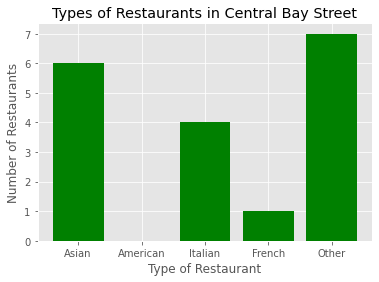

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['Asian', 'American', 'Italian', 'French', 'Other']
energy = [len(asian), len(american), len(italian), len(french), len(other)]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Type of Restaurant")
plt.ylabel("Number of Restaurants")
plt.title("Types of Restaurants in Central Bay Street")

plt.xticks(x_pos, x)

plt.show()

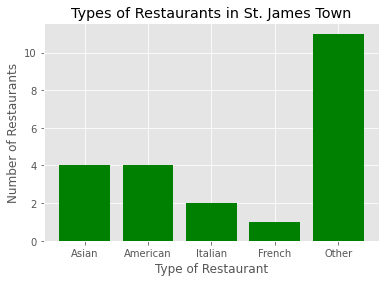

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['Asian', 'American', 'Italian', 'French', 'Other']
energy = [len(asian2), len(american2), len(italian2), len(french2), len(other2)]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Type of Restaurant")
plt.ylabel("Number of Restaurants")
plt.title("Types of Restaurants in St. James Town")

plt.xticks(x_pos, x)

plt.show()

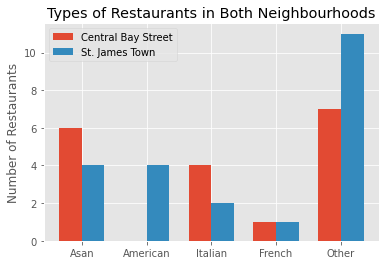

In [50]:
N = 5
Central_Bay_Street = [len(asian), len(american), len(italian), len(french), len(other)]
St_James_Town = [len(asian2), len(american2), len(italian2), len(french2), len(other2)]

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, Central_Bay_Street, width, label='Central Bay Street')
plt.bar(ind + width, St_James_Town, width,
    label='St. James Town')

plt.ylabel('Number of Restaurants')
plt.title('Types of Restaurants in Both Neighbourhoods')

plt.xticks(ind + width / 2, ('Asan', 'American', 'Italian', 'French', 'Other'))
plt.legend(loc='best')
plt.show()

In [51]:
toronto_merged_cbs = toronto_merged[toronto_merged['Neighbourhood'] == 'Central Bay Street']
toronto_merged_sjt = toronto_merged[toronto_merged['Neighbourhood'] == 'St. James Town']


In [52]:
toronto_merged_cbs.drop(['Latitude','Longitude','Cluster Labels'], inplace = True, axis = 1)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
toronto_merged_cbs.drop(['Postal Code', 'Borough'], inplace = True, axis = 1)

In [54]:
toronto_merged_cbs

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Salad Place,Bubble Tea Shop,Burger Joint,Miscellaneous Shop,Japanese Restaurant,Juice Bar


In [55]:
toronto_merged_sjt.drop(['Latitude','Longitude','Cluster Labels','Postal Code','Borough'], inplace = True, axis = 1)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
toronto_merged_sjt

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,St. James Town,Café,Coffee Shop,American Restaurant,Gastropub,Cocktail Bar,Clothing Store,Farmers Market,Gym,Hotel,Department Store


In [57]:
#HOTELS
hh = my_cluster['Venue Category']

hotels1= [] #Central Bay Street

for i in hh: 
    if 'otel' in i:
        hotels1.append(i)
        
hh1 = my_cluster2['Venue Category']

hotels2 = [] #St. James Town

for i in hh1:
    if 'otel' in i:
        hotels2.append(i)
        
#CAFES
cc = my_cluster['Venue Category']

cafes1= [] #Central Bay Street

for i in cc: 
    if 'afé' in i:
        cafes1.append(i)
    elif 'offee' in i:
        cafes1.append(i)
        
cc1 = my_cluster2['Venue Category']

cafes2 = [] #St. James Town

for i in cc1:
    if 'afé' in i:
        cafes2.append(i)
    elif 'offee' in i:
        cafes2.append(i)
        


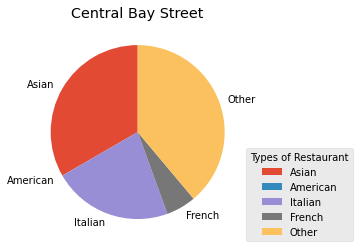

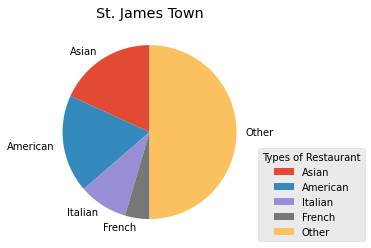

In [58]:
num_restaurants1 = len(asian)+len(american)+len(italian)+len(french)+len(other)
num_restaurants2 = len(asian2)+len(american2)+len(italian2)+len(french2)+len(other2)
num_hotels1 = len(hotels1)
num_hotels2 = len(hotels2)
num_cafes1 = len(cafes1)
num_cafes2 = len(cafes2)

ykl = np.array([len(asian), len(american), len(italian), len(french), len(other)])
mylabels = ["Asian", "American", "Italian", "French","Other"]

plt.title('Central Bay Street')
plt.pie(ykl, labels = mylabels, startangle = 90)
plt.legend(title = "Types of Restaurant",loc = [1,0])
plt.show() 


ykl2 = np.array([len(asian2), len(american2), len(italian2), len(french2), len(other2)])
mylabels2 = ["Asian", "American", "Italian", "French","Other"]

plt.title('St. James Town')
plt.pie(ykl2, labels = mylabels2, startangle = 90)
plt.legend(title = "Types of Restaurant",loc = [1,0])
plt.show() 



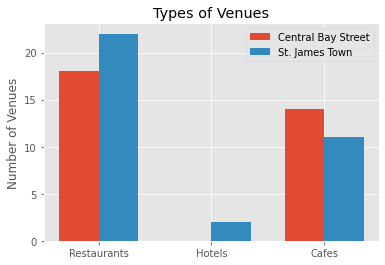

In [59]:
N = 3
CBS = [num_restaurants1, num_hotels1, num_cafes1] 
SJT = [num_restaurants2, num_hotels2, num_cafes2]

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, CBS, width, label='Central Bay Street')
plt.bar(ind + width, SJT, width,
    label='St. James Town')

plt.ylabel('Number of Venues')
plt.title('Types of Venues')

plt.xticks(ind + width / 2, ('Restaurants','Hotels','Cafes'))
plt.legend(loc='best')
plt.show()